# Image Assembly

Raw ScanImage `.tiff` files are saved to disk in an interleaved manner.

`mbo_utilities.imread` reads these files directly, returning a lazy array with shape `[T, Z, Y, X]` and ScanImage metadata attached. This replaces the previous scanreader-based workflow.

The general workflow is:

- Set up filepaths.
- Use `mbo_utilities.imread` to load raw `.tiff` files as a lazy array.
- Optionally preview with `fastplotlib`.
- Save assembled planes to disk with `mbo_utilities.save_as`, or pass directly to the pipeline.

In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np

import fastplotlib as fpl
import matplotlib.pyplot as plt

from mbo_utilities import imread, get_files
import mbo_utilities as mbo

## Input data: Path to your raw .tiff file(s)

Before processing, ensure:
- Put all raw `.tiff` files, from a single imaging session, into a directory.
    - Here, we name that directory `raw`
- No other `.tiff` files reside in this directory

## Load raw ScanImage data

Pass a directory or file path to `imread`. It returns a lazy array with shape `[T, Z, Y, X]` and metadata from the ScanImage headers.

In [ ]:
parent_dir = r"D:\SANDBOX\demo"
raw_tiff_files = get_files(parent_dir, str_contains='tif', max_depth=1)
raw_tiff_files

## Lazy array

`imread` returns a lazy array with shape `[T, Z, Y, X]`. Data is not loaded into memory until you index into it or call `np.asarray()`.

The array carries ScanImage metadata as `.metadata`.

In [ ]:
scan = imread(parent_dir)

print(f"Shape [T, Z, Y, X]: {scan.shape}")
print(f"Dtype: {scan.dtype}")

if hasattr(scan, "metadata"):
    meta = scan.metadata
    print(f"Frame rate: {meta.get('fr', 'N/A')} Hz")
    print(f"Num planes: {meta.get('num_planes', 'N/A')}")

In [ ]:
preview_widget = fpl.ImageWidget(scan, histogram_widget=False, graphic_kwargs={"vmin": -300, "vmax": 12000})

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
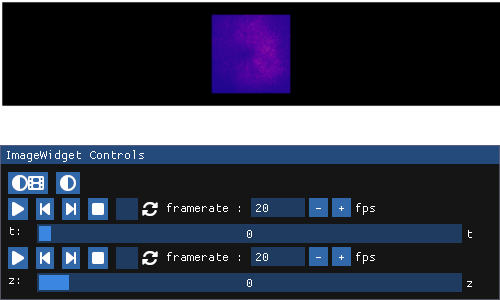

In [9]:
preview_widget.show()

In [10]:
preview_widget.close()

In [ ]:
nframes, nplanes = scan.shape[0], scan.shape[1]
print(f"Planes: {nplanes}")
print(f"Frames: {nframes}")

Lazy arrays support numpy-style indexing without loading everything into memory.

In [ ]:
# single plane: [T, Y, X]
array = scan[:100, 0, :, :]
print(f"[T, Y, X]: {array.shape} (first 100 frames, plane 0)")

In [ ]:
# multiple planes: [T, Z, Y, X]
array = scan[:100, 1:3, :, :]
print(f"[T, Z, Y, X]: {array.shape} (first 100 frames, planes 1-2)")

In [30]:
del array

### View a single z-plane timeseries

You can pass in the scan object to preview your data before saving it to disk.

```{warning}
Make sure you set histogram_widget=False or you will get an index error.
```

RFBOutputContext()

JupyterRenderCanvas(css_height='560.0px', css_width='900.0px')
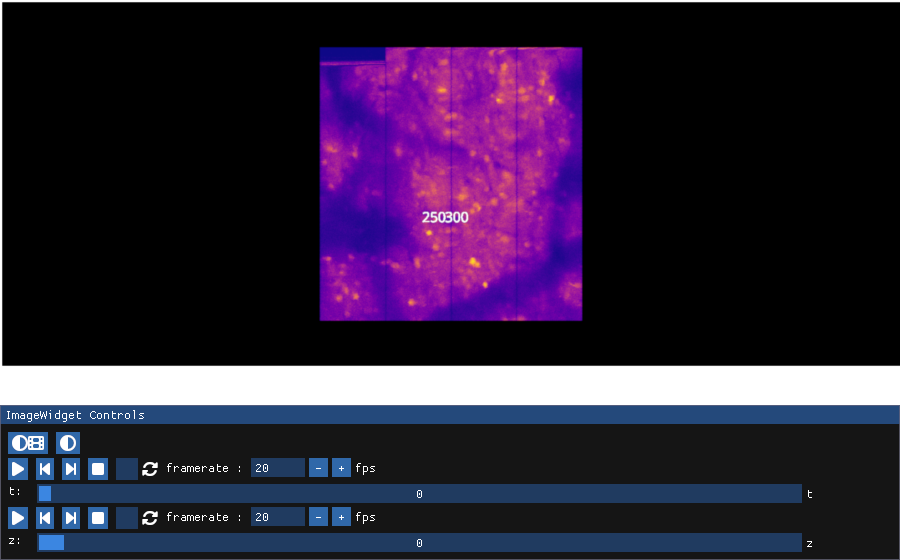

In [4]:
image_widget = fpl.ImageWidget(scan, histogram_widget=False,  figure_kwargs={"size": (900, 560)},graphic_kwargs={"vmin": -300,"vmax": 12000}))
image_widget.figure[0, 0].auto_scale()
image_widget.show()

In [19]:
image_widget.close()

### Include more z-planes for a 4D graphic

## Path to save your files

We can save the assembled planes to disk. The currently supported file extensions are `.tiff`.

You can also skip this step entirely and pass the lazy array directly to `lcp.pipeline()`.

In [28]:
save_path = Path(parent_dir) / 'assembled'
save_path.mkdir(exist_ok=True)

We pass our scan object, along with the save path into `mbo.save_as()`

In [31]:
mbo.save_as(scan, save_path, overwrite=True, append_str="_assembled", ext='.tiff')

Reading tiff series data...
Reading tiff pages...
Raw tiff fully read.
Saving 14 planes.


Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 30.62it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_1_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.57it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_2_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.86it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_3_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.96it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_4_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.71it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_5_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.87it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_6_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 28.91it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_7_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 28.85it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_8_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.71it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_9_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.28it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_10_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.99it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_11_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 29.49it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_12_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 30.03it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_13_assembled.tiff.



Saving chunks: 100%|██████████████████████████████████████████████████████████████████████████████████████| 196/196 [00:06<00:00, 30.81it/s]

Data successfully saved to D:\SANDBOX\demo\assembled\plane_14_assembled.tiff.



Saving planes: 100%|████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:32<00:00,  6.59s/it]

Data successfully saved to D:\SANDBOX\demo\assembled.


### Read back in your file to make sure it saved properly

Make sure you include the `append_str` from the `save_as()` function.

In [ ]:
img = imread(Path(save_path) / 'plane_1_assembled.tiff')
img.shape

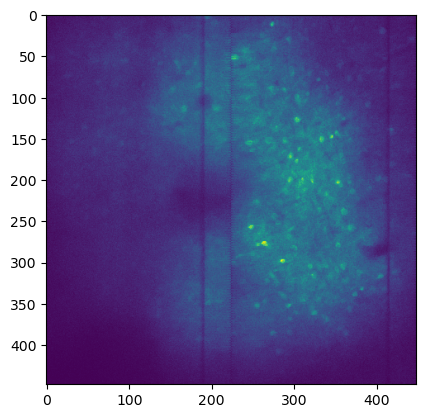

In [36]:
plt.imshow(np.mean(img,axis=0))

RFBOutputContext()

JupyterRenderCanvas(css_height='800.0px', css_width='1200.0px')
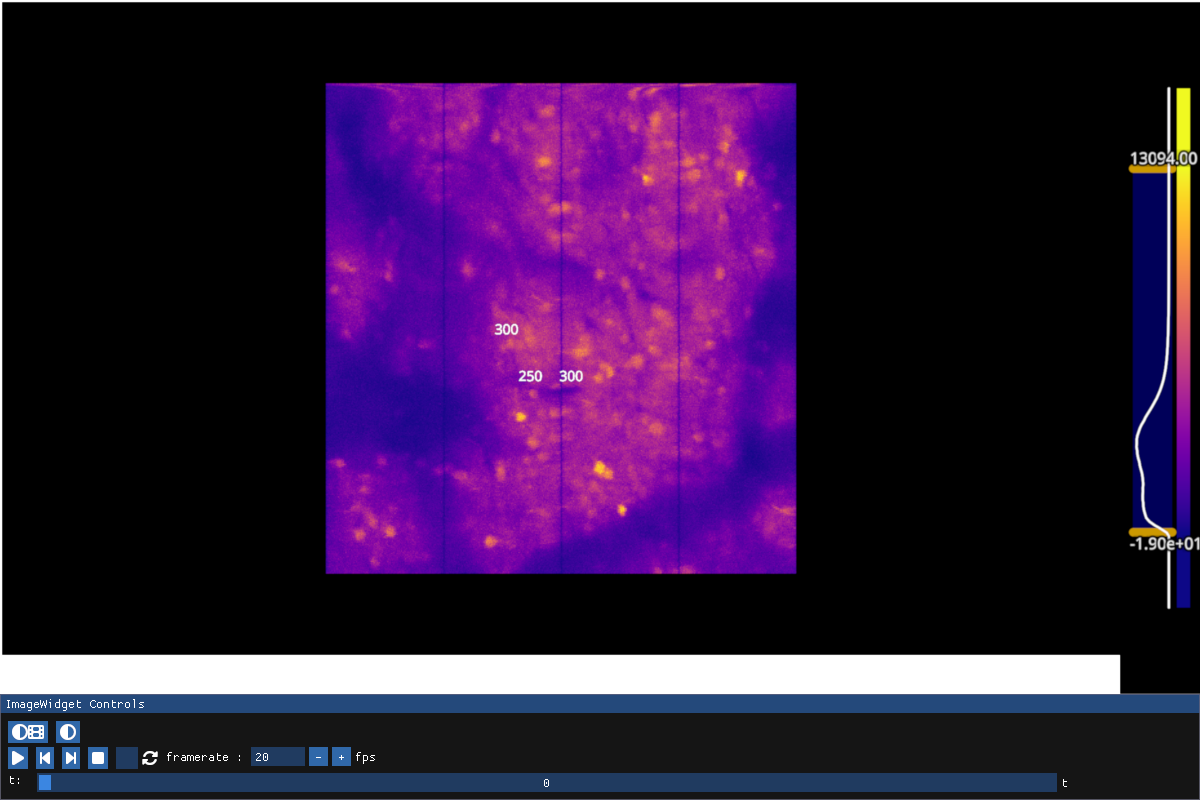

In [12]:
image_widget = fpl.ImageWidget(img, figure_kwargs={"size":(1200, 800)})
image_widget.show()

In [13]:
image_widget.close()

### Preview raw traces

We can also preview the raw traces of the assembled image.

Click on a pixel to view the raw trace for that pixel over time.

In [16]:
from ipywidgets import VBox
iw_movie = fpl.ImageWidget(img, cmap="viridis", figure_kwargs={"size": (900, 560)},)

tfig = fpl.Figure()

raw_trace = tfig[0, 0].add_line(np.zeros(img.shape[0]))

@iw_movie.managed_graphics[0].add_event_handler("click")
def pixel_clicked(ev):
    col, row = ev.pick_info["index"]
    raw_trace.data[:, 1] =  iw_movie.data[0][:, row, col]
    tfig[0, 0].auto_scale(maintain_aspect=False)

VBox([iw_movie.show(), tfig.show()])

RFBOutputContext()

RFBOutputContext()